In [1]:
from lionagi.core.messages import Instruction, System
from lionagi.core.schema.structure import Structure
from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.branch.executable_branch import ExecutableBranch

In [2]:
from lionagi.core.tool.tool_manager import func_to_tool

In [3]:
def multiply(number1: float, number2: float):
    """
    Perform multiplication on two numbers.

    Args:
        number1: First number to multiply.
        number2: Second number to multiply.

    Returns:
        The product of number1 and number2.

    """
    return number1 * number2


tool_m = func_to_tool(multiply)

In [4]:
sys_mul = System(
    system="you are asked to perform as a function picker and parameter provider"
)
instruction = Instruction(
    instruction="Think step by step, understand the following basic math question and provide parameters for function calling."
)

In [5]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"

import json

context = {"Question1": question1, "question2": question2}
context = json.dumps(context)

# Create Graph-based Structure

In [6]:
struct_mul = Structure()
struct_mul.add_node(sys_mul)
struct_mul.add_node(instruction)
struct_mul.add_node(tool_m[0])
struct_mul.add_relationship(sys_mul, instruction)
struct_mul.add_relationship(instruction, tool_m[0])

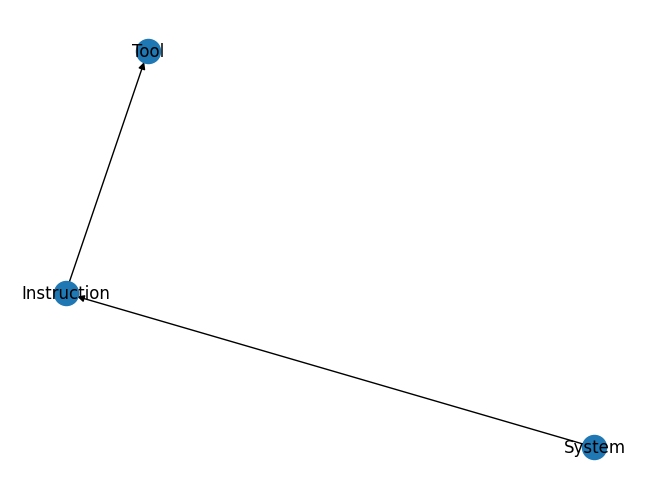

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_mul.graph.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [8]:
## output_parser_func parameter: agent self
def multiply_output_parser(agent):
    return agent.executable.responses


executable = ExecutableBranch()

In [9]:
calc = BaseAgent(
    structure=struct_mul,
    executable_obj=executable,
    output_parser=multiply_output_parser,
)

In [10]:
result = await calc.execute(context=context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

In [11]:
calc.executable.branch.messages

,node_id,timestamp,role,sender,recipient,content
0,5fa9518a05bc0ef2823354be2f39d70b,2024_03_21T14_56_37_679951+00_00,system,system,assistant,"{""system_info"": ""you are asked to perform as a..."
1,93b4abe29a0ce393cbb410b8edc52d16,2024_03_21T14_56_38_575615+00_00,user,user,assistant,"{""instruction"": ""Think step by step, understan..."
2,e89628605e74ff9d5290f51242a54b22,2024_03_21T14_56_42_122397+00_00,assistant,action_request,action,"{""action_request"": [{""action"": ""action_multipl..."
3,de110f1a9701e14edf36f2468cb25d4c,2024_03_21T14_56_42_123636+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
4,8d909f901f759ed6f8ea03c29aa1e757,2024_03_21T14_56_42_124209+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."


In [12]:
for content in calc.executable.branch.messages["content"]:
    print(content)

{"system_info": "you are asked to perform as a function picker and parameter provider"}
{"instruction": "Think step by step, understand the following basic math question and provide parameters for function calling.", "context": "{\"Question1\": \"A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?\", \"question2\": \"A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?\"}"}
{"action_request": [{"action": "action_multiply", "arguments": "{\"number1\": 25, \"number2\": 8}"}, {"action": "action_multiply", "arguments": "{\"number1\": 48, \"number2\": 1}"}]}
{"action_response": {"function": "multiply", "arguments": {"number1": 25, "number2": 8}, "output": 200}}
{"action_response":